In [1]:
import comet_ml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
comet_api = comet_ml.api.API()

In [3]:
exps = comet_api.get('federated-learning/2c-opt')

In [4]:
lrs = [float(exp.get_parameters_summary('LEARNING_RATE')['valueMax']) for exp in exps]
teas = [float(exp.get_metrics_summary('test_acc')['valueMax']) for exp in exps]
crs = [int(exp.get_parameters_summary('curr_round')['valueMax']) for exp in exps]
opts = [exp.get_parameters_summary('OPT')['valueMax'] for exp in exps]
opt_strats = [exp.get_parameters_summary('opt_srategy')['valueMax'] for exp in exps]

In [5]:
df = pd.DataFrame({'lr': lrs, 'test_acc': teas, 'round': crs, 'opt': opts, 'opt_str': opt_strats})
df_fin = df[df['test_acc'] > 99]

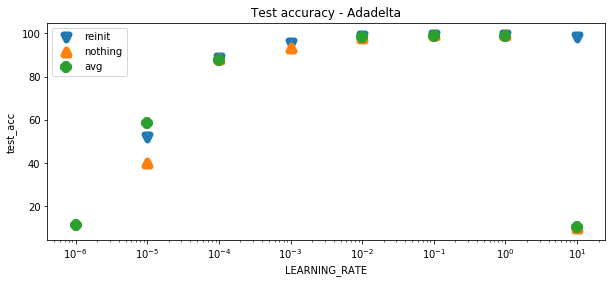

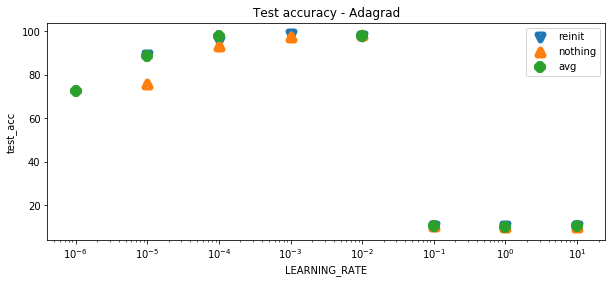

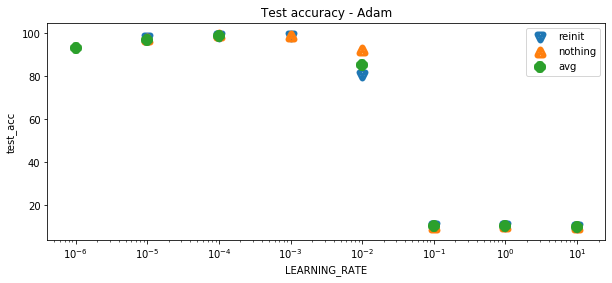

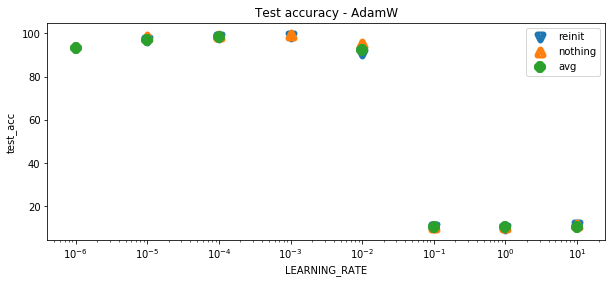

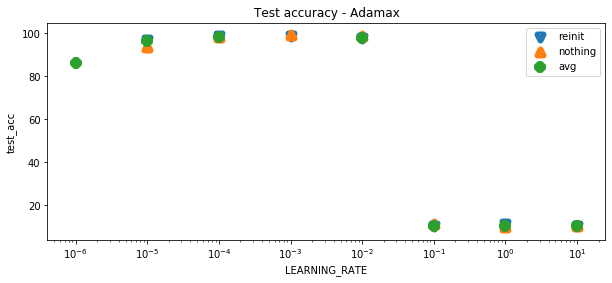

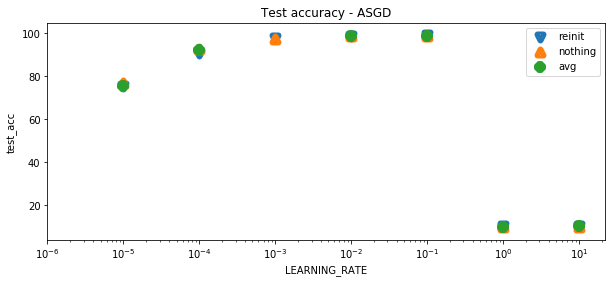

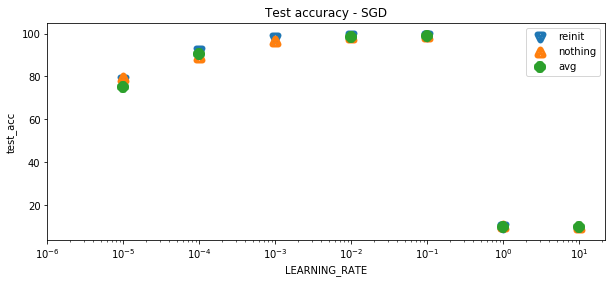

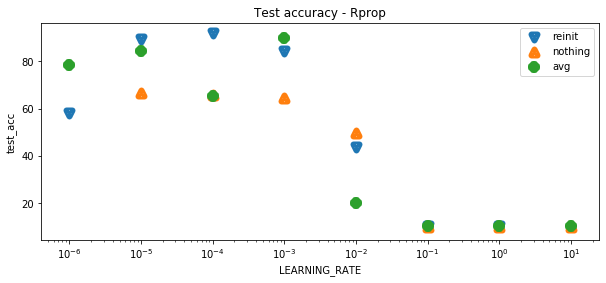

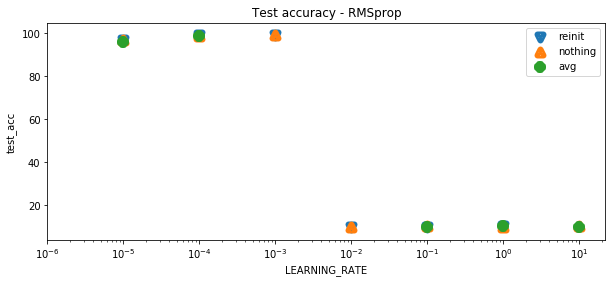

In [6]:
base_dir = '2c_opt'
os.makedirs(base_dir, exist_ok=True)

plt.rcParams["figure.figsize"] = (10, 4)
opt_str_l = pd.unique(df['opt_str'])
markers = ["v", "^", "P"]
for opt in pd.unique(df['opt']):
    for i, opt_str in enumerate(opt_str_l):
        df_tmp = df[(df['opt'] == opt) & (df['opt_str'] == opt_str)].sort_values(by=['lr'])# & (df['test_acc'] > 80)]
        plt.scatter(df_tmp['lr'], df_tmp['test_acc'], marker=markers[i], linewidths=6, alpha=1)
        plt.xlabel('LEARNING_RATE')
        plt.ylabel('test_acc')
        plt.xscale("log")
        plt.xticks(list(set(lrs)))
    plt.title(f'Test accuracy - {opt}')
    plt.legend(opt_str_l)
    plt.savefig(f"{base_dir}/total_{opt}_{opt_str}.svg")
    plt.show()


In [7]:
df_fin.loc[df_fin.groupby(by=['opt', 'opt_str'])['round'].idxmin()]
for i, opt_str in enumerate(opt_str_l):
    df_tmp = df_fin[df_fin['opt_str'] == opt_str]
    df_tmp = df_tmp.loc[df_tmp.groupby(by=['opt'])['round'].idxmin()].sort_values('round', ascending=True)[['round', 'opt']]
    df_tmp.to_csv(f'{base_dir}/{opt_str}.csv', header=['Rounds', 'Optimizer'], index=False)